In [1]:
import numpy as np
import pandas as pd

import copy

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns

In [2]:
plt.rcParams["font.family"] = 'Arial'
plt.rc('font', size=15)

In [3]:
delta_LMH = pd.read_excel('./data/delta/LMH.xlsx')
delta_UD = pd.read_excel('./data/delta/UD.xlsx')

base_LMH = pd.read_excel('./data/base/base_LMH.xlsx')
base_UD = pd.read_excel('./data/base/base_UD.xlsx')

followup_LMH = pd.read_excel('./data/followup/followup_LMH.xlsx')
followup_UD = pd.read_excel('./data/followup/followup_UD.xlsx')

## Fig2

In [4]:
ct = pd.crosstab(delta_UD.income_base, delta_UD.income_followup)
ct

income_followup,1,2,3,4,5,6,7,8,9,10
income_base,,,,,,,,,,
1,0,38,9,10,9,2,3,1,3,0
2,23,0,31,24,17,5,6,3,0,0
3,6,20,0,34,18,11,9,2,1,0
4,10,15,26,0,72,34,19,7,2,0
5,9,10,10,27,0,95,59,9,8,0
6,4,3,2,16,46,0,187,40,22,0
7,4,4,5,2,33,55,0,283,85,4
8,0,6,1,2,1,12,95,0,405,11
9,0,2,1,0,7,4,33,119,0,224


In [5]:
consistent = list(delta_LMH.groupby(['income_original']).size())
for i in range(len(consistent)):
    idx = i+1
    ct[idx][idx] = consistent[i]

ct

income_followup,1,2,3,4,5,6,7,8,9,10
income_base,,,,,,,,,,
1,70,38,9,10,9,2,3,1,3,0
2,23,42,31,24,17,5,6,3,0,0
3,6,20,14,34,18,11,9,2,1,0
4,10,15,26,58,72,34,19,7,2,0
5,9,10,10,27,106,95,59,9,8,0
6,4,3,2,16,46,196,187,40,22,0
7,4,4,5,2,33,55,382,283,85,4
8,0,6,1,2,1,12,95,420,405,11
9,0,2,1,0,7,4,33,119,1535,224


## Fig3

In [354]:
delta_total = pd.concat([delta_LMH, delta_UD], ignore_index=True)
delta_total

,subjectkey,age_base,gender,income_original,White,Black,Others,GE,Philips,SIEMENS,...,ddtidp_746,ddtidp_747,ddtidp_748,ddtidp_749,ddtidp_750,ddtidp_751,ddtidp_752,income_base,income_followup,income
0,NDAR_INVP8D1V80P,131,1,10.0,1,0,0,0,0,1,...,0.003280,-0.000109,-0.000670,0.002306,-0.001374,-0.007553,0.007690,NaN,NaN,NaN
1,NDAR_INV165NRNVG,125,0,8.0,1,0,0,0,0,1,...,0.013298,0.016376,0.021466,0.008680,0.024865,0.004983,0.012114,NaN,NaN,NaN
2,NDAR_INV55285WTD,110,1,8.0,1,1,0,0,0,1,...,0.023368,0.015852,0.071800,-0.010462,0.014085,0.009368,0.014665,NaN,NaN,NaN
3,NDAR_INVCZGRXUKT,129,0,9.0,0,0,1,0,0,1,...,0.006515,0.004172,-0.010354,-0.003471,-0.000526,0.000326,0.006678,NaN,NaN,NaN
4,NDAR_INVRXKGP8CG,126,0,10.0,1,0,0,0,0,1,...,0.006601,0.008712,0.061616,-0.005952,-0.011503,-0.006908,0.002999,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5908,NDAR_INV3VX26MGH,128,1,NaN,1,0,0,0,0,1,...,-0.005620,-0.004740,-0.018010,0.003442,-0.014392,-0.002039,-0.024943,7.0,8.0,1.0
5909,NDAR_INV7FG8NTPP,131,0,NaN,1,0,0,0,0,1,...,-0.007656,0.001069,-0.000692,-0.010093,-0.009926,-0.007396,-0.006715,8.0,9.0,1.0
5910,NDAR_INV8PAZYD33,122,0,NaN,1,0,1,1,0,0,...,0.003244,0.012518,0.039737,0.002993,0.003228,0.008574,-0.027050,4.0,5.0,1.0
5911,NDAR_INVXT2DPHB8,119,0,NaN,1,0,0,0,0,1,...,-0.002655,0.001317,0.005500,0.008513,0.010234,-0.000725,-0.012094,1.0,8.0,1.0


In [355]:
print('[# of null]')
print('age) base', delta_total['age_base'].isnull().sum())
print('age) followup', delta_total['age_followup'].isnull().sum())
print('gender)', delta_total['gender'].isnull().sum())
print('scanner)',delta_total['GE'].isnull().sum(),delta_total['Philips'].isnull().sum(), delta_total['SIEMENS'].isnull().sum())
print('race)',delta_total['White'].isnull().sum(),delta_total['Black'].isnull().sum(), delta_total['Others'].isnull().sum())

[# of null]
age) base 0
age) followup 0
gender) 0
scanner) 0 0 0
race) 0 0 0


### age

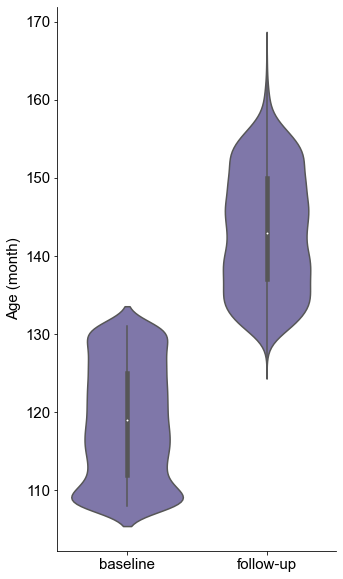

In [806]:
fig, ax = plt.subplots(figsize=(5,10))

sns.violinplot(data = delta_total[['age_base', 'age_followup']], color='#796eb2')

ax.set_xticklabels(['baseline','follow-up'])
plt.ylabel('Age (month)')

ax.spines['right'].set_visible(False) # 오른쪽 축 안보이게
ax.spines['top'].set_visible(False)

### distribution

In [357]:
def dist(df):
    print('[gender]')
    print(df.groupby(['gender']).size())

    print('\n[scanner]')
    print('GE\t', df['GE'].sum())
    print('Philips\t', df['Philips'].sum())
    print('SIEMENS\t', df['SIEMENS'].sum())
    print(df['GE'].sum()+df['Philips'].sum()+df['SIEMENS'].sum())

    print('\n[race]')
    print('White\t', df['White'].sum())
    print('Black\t', df['Black'].sum())
    print('Others\t', df['Others'].sum())
    print(df['White'].sum()+df['Black'].sum()+df['Others'].sum())

In [358]:
dist(delta_total)

[gender]
gender
0    2741
1    3172
dtype: int64

[scanner]
GE	 1514
Philips	 701
SIEMENS	 3698
5913

[race]
White	 4776
Black	 1000
Others	 883
6659


In [146]:
# gender
delta_total.groupby(['gender']).size()

gender
0    2741
1    3172
dtype: int64

In [150]:
# scanner(GE	Philips	SIEMENS)
print('GE\t', delta_total['GE'].sum())
print('Philips\t', delta_total['Philips'].sum())
print('SIEMENS\t', delta_total['SIEMENS'].sum())
delta_total['GE'].sum()+delta_total['Philips'].sum()+delta_total['SIEMENS'].sum()

GE	 1514
Philips	 701
SIEMENS	 3698


5913

In [151]:
# race(White	Black	Others)
print('White\t', delta_total['White'].sum())
print('Black\t', delta_total['Black'].sum())
print('Others\t', delta_total['Others'].sum())
delta_total['White'].sum()+delta_total['Black'].sum()+delta_total['Others'].sum()

White	 4776
Black	 1000
Others	 883


6659

## Fig4

In [173]:
ud_base = pd.DataFrame(data=delta_UD.age_base)
ud_base['category'] = 'base'
ud_base['ud'] = delta_UD.income
ud_base.columns = ['age', 'category', 'ud']
ud_base
#ud_violin = pd.concat(UD.age_base, UD.age_followup)

,age,category,ud
0,115,base,1
1,109,base,1
2,109,base,0
3,131,base,1
4,112,base,1
...,...,...,...
2483,128,base,1
2484,131,base,1
2485,122,base,1
2486,119,base,1


In [174]:
ud_fu = pd.DataFrame(data=delta_UD.age_followup)
ud_fu['category'] = 'fu'
ud_fu.columns = ['age', 'category']
ud_fu['ud'] = delta_UD.income
ud_fu

,age,category,ud
0,137,fu,1
1,131,fu,1
2,133,fu,0
3,153,fu,1
4,136,fu,1
...,...,...,...
2483,149,fu,1
2484,155,fu,1
2485,144,fu,1
2486,143,fu,1


In [175]:
ud_violin = pd.concat([ud_base, ud_fu])
ud_violin

,age,category,ud
0,115,base,1
1,109,base,1
2,109,base,0
3,131,base,1
4,112,base,1
...,...,...,...
2483,149,fu,1
2484,155,fu,1
2485,144,fu,1
2486,143,fu,1


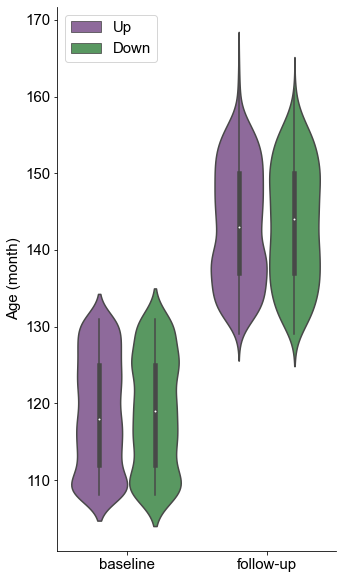

In [807]:
fig, ax = plt.subplots(figsize=(5,10))

# Up=1, Down=0
sns.violinplot(data = ud_violin, x='category', y='age', hue='ud', palette=sns.color_palette(['#9262a3','#4ea359']), hue_order=[1,0], split=False)

ax.set_xticklabels(['baseline','follow-up'])
ax.legend(loc='upper left',handles=ax.legend_.legendHandles, labels=['Up', 'Down'])
plt.xlabel('')
plt.ylabel('Age (month)')

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)


plt.show()

In [184]:
# increased group
dist(delta_UD[delta_UD['income']==1])

[gender]
gender
0    863
1    939
dtype: int64

[scanner]
GE	 448
Philips	 193
SIEMENS	 1161
1802

[race]
White	 1365
Black	 370
Others	 290
2025


In [185]:
# decreased group
dist(delta_UD[delta_UD['income']==0])

[gender]
gender
0    304
1    382
dtype: int64

[scanner]
GE	 200
Philips	 88
SIEMENS	 398
686

[race]
White	 499
Black	 187
Others	 104
790


## Fig5

In [187]:
condition = [
    (delta_LMH['income_original']<=5),
    (delta_LMH['income_original']<=8)&(delta_LMH['income_original']>5),
    (delta_LMH['income_original']>8)
]
income_cat = ['Low', 'Middle', 'High']
delta_LMH['LMH'] = np.select(condition, income_cat)
delta_LMH

,subjectkey,age_base,gender,income_original,White,Black,Others,GE,Philips,SIEMENS,...,ddtidp_744,ddtidp_745,ddtidp_746,ddtidp_747,ddtidp_748,ddtidp_749,ddtidp_750,ddtidp_751,ddtidp_752,LMH
0,NDAR_INVP8D1V80P,131,1,10,1,0,0,0,0,1,...,0.000364,-0.017100,0.003280,-0.000109,-0.000670,0.002306,-0.001374,-0.007553,0.007690,High
1,NDAR_INV165NRNVG,125,0,8,1,0,0,0,0,1,...,0.002349,-0.004225,0.013298,0.016376,0.021466,0.008680,0.024865,0.004983,0.012114,Middle
2,NDAR_INV55285WTD,110,1,8,1,1,0,0,0,1,...,0.013371,0.003971,0.023368,0.015852,0.071800,-0.010462,0.014085,0.009368,0.014665,Middle
3,NDAR_INVCZGRXUKT,129,0,9,0,0,1,0,0,1,...,0.010211,-0.008780,0.006515,0.004172,-0.010354,-0.003471,-0.000526,0.000326,0.006678,High
4,NDAR_INVRXKGP8CG,126,0,10,1,0,0,0,0,1,...,0.031495,-0.031366,0.006601,0.008712,0.061616,-0.005952,-0.011503,-0.006908,0.002999,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420,NDAR_INVEVXURKC9,119,1,10,1,0,0,0,0,1,...,-0.024861,-0.004951,0.004614,-0.023319,-0.050881,-0.013648,-0.020191,-0.009565,-0.057413,High
3421,NDAR_INV504L1YB4,128,1,9,1,0,0,0,0,1,...,0.005855,-0.003892,0.007174,-0.000810,-0.017192,0.016543,-0.004114,-0.001885,0.001091,High
3422,NDAR_INV5PU4UNRW,121,0,10,1,0,0,0,0,1,...,0.034015,-0.005520,0.001708,-0.027389,0.043151,0.019675,-0.009051,-0.003839,-0.011630,High
3423,NDAR_INVY3HRTGKA,108,1,9,1,0,0,0,0,1,...,0.037292,0.022333,0.011701,0.006902,0.055138,0.009934,0.082980,0.030253,0.048191,High


In [188]:
lmh_base = pd.DataFrame(data=delta_LMH.age_base)
lmh_base['category'] = 'base'
lmh_base.columns = ['age', 'category']
lmh_base['lmh'] = delta_LMH.LMH
lmh_base

,age,category,lmh
0,131,base,High
1,125,base,Middle
2,110,base,Middle
3,129,base,High
4,126,base,High
...,...,...,...
3420,119,base,High
3421,128,base,High
3422,121,base,High
3423,108,base,High


In [189]:
lmh_fu = pd.DataFrame(data=delta_LMH.age_followup)
lmh_fu['category'] = 'fu'
lmh_fu.columns = ['age', 'category']
lmh_fu['lmh'] = delta_LMH.LMH
lmh_fu

,age,category,lmh
0,154,fu,High
1,155,fu,Middle
2,133,fu,Middle
3,153,fu,High
4,152,fu,High
...,...,...,...
3420,143,fu,High
3421,149,fu,High
3422,146,fu,High
3423,131,fu,High


In [190]:
lmh_violin = pd.concat([lmh_base, lmh_fu])
lmh_violin

,age,category,lmh
0,131,base,High
1,125,base,Middle
2,110,base,Middle
3,129,base,High
4,126,base,High
...,...,...,...
3420,143,fu,High
3421,149,fu,High
3422,146,fu,High
3423,131,fu,High


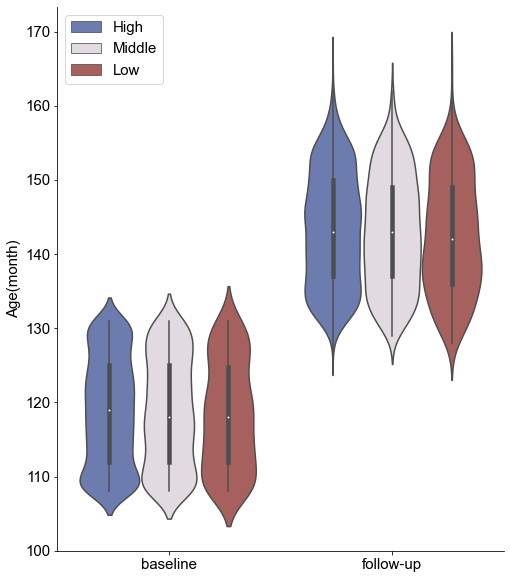

In [805]:
fig, ax = plt.subplots(figsize=(8,10))

# Up=1, Down=0
sns.violinplot(data = lmh_violin, x='category', y='age', hue='lmh', palette='twilight_shifted')

ax.set_xticklabels(['baseline','follow-up'])
ax.legend(loc='upper left',handles=ax.legend_.legendHandles, labels=['High', 'Middle', 'Low'])
plt.xlabel('')
plt.ylabel('Age(month)')

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)


plt.show()

In [194]:
# high
dist(delta_LMH[delta_LMH['LMH']=='High'])

[gender]
gender
0     961
1    1176
dtype: int64

[scanner]
GE	 504
Philips	 292
SIEMENS	 1341
2137

[race]
White	 1972
Black	 128
Others	 256
2356


In [197]:
# mid
dist(delta_LMH[delta_LMH['LMH']=='Middle'])

[gender]
gender
0    485
1    513
dtype: int64

[scanner]
GE	 267
Philips	 101
SIEMENS	 630
998

[race]
White	 800
Black	 173
Others	 175
1148


In [198]:
# low
dist(delta_LMH[delta_LMH['LMH']=='Low'])

[gender]
gender
0    128
1    162
dtype: int64

[scanner]
GE	 95
Philips	 27
SIEMENS	 168
290

[race]
White	 140
Black	 142
Others	 58
340


## Fig6,7,8

#### total data preprocessing

In [370]:
delta_total = pd.concat([delta_LMH, delta_UD], ignore_index=True)
base_total = pd.concat([base_LMH, base_UD], ignore_index=True)
followup_total = pd.concat([followup_LMH, followup_UD], ignore_index=True)

##### add category column 

In [392]:
def total_category(df_total, UD_cat='income', LMH_cat='income_original'):
    category_list = []
    for idx in range(len(df_total)):
        if pd.isna(df_total[UD_cat][idx]) != True:
            if df_total[UD_cat][idx]==0:
                cat = 'D'
            else:
                cat = 'U'

        else:
            if df_total[LMH_cat][idx]>8:
                cat = 'H'
            elif df_total[LMH_cat][idx]<6:
                cat = 'L'
            else:
                cat = 'M'

        category_list.append(cat)

    return category_list

In [412]:
delta_total.insert(1, 'category', total_category(delta_total))
base_total.insert(1, 'category', total_category(base_total))
followup_total.insert(1, 'category', total_category(followup_total))

##### drop columns

In [422]:
def df_FA(df_total):
    total_FA = df_total.drop(columns = df_total.columns[2:12])
    total_FA = total_FA.drop(columns = df_total.columns[-3:])

    return total_FA

In [423]:
delta_total_FA = df_FA(delta_total)
base_total_FA = df_FA(base_total)
followup_total_FA = df_FA(followup_total)

print(delta_total_FA.shape)
print(base_total_FA.shape)
print(followup_total_FA.shape)

(5913, 150)
(5913, 150)
(5913, 150)


#### FA mean first normalize

In [683]:
import warnings
warnings.filterwarnings(action='ignore')

# generate mean subject
# base
total_base_s = base_total_FA.mean(axis=0)

ud_u_base_s = base_total_FA[base_total_FA['category']=='U'].mean(axis=0)
ud_d_base_s = base_total_FA[base_total_FA['category']=='D'].mean(axis=0)

lmh_l_base_s = base_total_FA[base_total_FA['category']=='L'].mean(axis=0)
lmh_m_base_s = base_total_FA[base_total_FA['category']=='M'].mean(axis=0)
lmh_h_base_s = base_total_FA[base_total_FA['category']=='H'].mean(axis=0)

# follow up
total_follow_s = followup_total_FA.mean(axis=0)

ud_u_follow_s = followup_total_FA[followup_total_FA['category']=='U'].mean(axis=0)
ud_d_follow_s = followup_total_FA[followup_total_FA['category']=='D'].mean(axis=0)

lmh_l_follow_s = followup_total_FA[followup_total_FA['category']=='L'].mean(axis=0)
lmh_m_follow_s = followup_total_FA[followup_total_FA['category']=='M'].mean(axis=0)
lmh_h_follow_s = followup_total_FA[followup_total_FA['category']=='H'].mean(axis=0)

# delta
total_delta_s = delta_total_FA.mean(axis=0)

ud_u_delta_s = delta_total_FA[delta_total_FA['category']=='U'].mean(axis=0)
ud_d_delta_s = delta_total_FA[delta_total_FA['category']=='D'].mean(axis=0)

lmh_l_delta_s = delta_total_FA[delta_total_FA['category']=='L'].mean(axis=0)
lmh_m_delta_s = delta_total_FA[delta_total_FA['category']=='M'].mean(axis=0)
lmh_h_delta_s = delta_total_FA[delta_total_FA['category']=='H'].mean(axis=0)

In [690]:
# normalize dataframe
BF_df = pd.concat([
    total_base_s.to_frame('total_base_s'), total_follow_s.to_frame('total_follow_s'),

    ud_u_base_s.to_frame('ud_u_base_s'), ud_u_follow_s.to_frame('ud_u_follow_s'),
    ud_d_base_s.to_frame('ud_d_base_s'), ud_d_follow_s.to_frame('ud_d_follow_s'),

    lmh_l_base_s.to_frame('lmh_l_base_s'), lmh_l_follow_s.to_frame('lmh_l_follow_s'),
    lmh_m_base_s.to_frame('lmh_m_base_s'), lmh_m_follow_s.to_frame('lmh_m_follow_s'),
    lmh_h_base_s.to_frame('lmh_h_base_s'), lmh_h_follow_s.to_frame('lmh_h_follow_s')
], axis=1).transpose()

delta_df = pd.concat([
    total_delta_s.to_frame('total_delta_s'),ud_u_delta_s.to_frame('ud_u_delta_s'), ud_d_delta_s.to_frame('ud_d_delta_s'), 
    lmh_l_delta_s.to_frame('lmh_l_delta_s'), lmh_m_delta_s.to_frame('lmh_m_delta_s'), lmh_h_delta_s.to_frame('lmh_h_delta_s')
    ],axis=1).transpose()

In [697]:
def MeanNormalize(df_total_FA, max_scale=4):
    tot_min = df_total_FA.values.min()
    tot_max = df_total_FA.values.max()


    norm_df = (df_total_FA-tot_min)/(tot_max-tot_min)
    norm_df *= max_scale

    return norm_df

In [700]:
base_total_destrieux = MeanNormalize(BF_df)
delta_destrieux = MeanNormalize(delta_df)

In [702]:
base_total_destrieux.to_csv('./brain_painter/base_total_destrieux.csv')
delta_destrieux.to_csv('./brain_painter/delta_destrieux.csv')